# Week 04: Exploratory Data Analysis - II

## COVID-19 Community Mobility


In this task, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the URL

url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007248 entries, 0 to 6007247
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [ ]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format.

In [ ]:
# df['date'] = ...
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007248 entries, 0 to 6007247
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_pharma

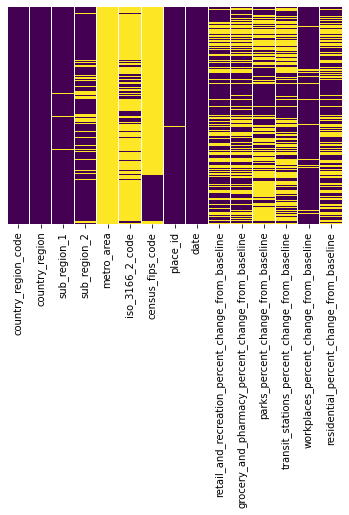

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here we will drop metro_code and iso_3166_2_code columns as most of the data is missing


In [ ]:
df.drop(['metro_code','iso_3166_2_code'],axis=1, inplace= True)

Next, you are going to extract the subset of data for the location of
your choice.

Let us extract subset of data in country_region='United States' and sub_region_1='New York' and sub_region_2='Suffolk County'

In [ ]:
df_subset= df[(df['country_region']=='United States') & (df['sub_region_1']=='New York') & (df['sub_region_2']== 'Suffolk County')]

In [ ]:

print(len(df_subset))
df_subset

505


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5423844,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-02-15,-1.0,-3.0,9.0,3.0,-1.0,0.0
5423845,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-02-16,1.0,-6.0,9.0,1.0,0.0,0.0
5423846,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-02-17,11.0,0.0,84.0,-25.0,-39.0,9.0
5423847,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-02-18,-1.0,-6.0,-13.0,-4.0,-11.0,4.0
5423848,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-02-19,3.0,-3.0,30.0,-1.0,-11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424344,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2021-06-29,2.0,0.0,205.0,-19.0,-33.0,4.0
5424345,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2021-06-30,5.0,5.0,202.0,-15.0,-32.0,5.0
5424346,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2021-07-01,2.0,4.0,88.0,-16.0,-32.0,7.0
5424347,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2021-07-02,-1.0,10.0,97.0,-9.0,-34.0,7.0


Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

The data is not complete and has 505 missing values for columns metro_area and iso_3166_2_code.

So we may drop the columns as they are not providing any input to the dependent data.

In [ ]:
# Check for missing data
df_subset.isnull().sum()


country_region_code                                    0
country_region                                         0
sub_region_1                                           0
sub_region_2                                           0
census_fips_code                                       0
place_id                                               0
date                                                   0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                    39
transit_stations_percent_change_from_baseline          0
workplaces_percent_change_from_baseline                0
residential_percent_change_from_baseline               0
dtype: int64

In [ ]:
df_subset[df_subset['parks_percent_change_from_baseline'].isnull()]


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5423914,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-04-25,-52.0,-14.0,NaN,-54.0,-36.0,14.0
5423921,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-05-02,-45.0,-11.0,NaN,-47.0,-32.0,12.0
5423935,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-05-16,-40.0,-6.0,NaN,-40.0,-26.0,10.0
5423949,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-05-30,-36.0,-1.0,NaN,-33.0,-13.0,8.0
5423956,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-06-06,-35.0,1.0,NaN,-34.0,-13.0,7.0
5423963,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-06-13,-26.0,7.0,NaN,-21.0,-9.0,4.0
5423970,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-06-20,-21.0,16.0,NaN,-17.0,-9.0,3.0
5423977,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-06-27,-23.0,4.0,NaN,-22.0,-11.0,4.0
5423984,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-07-04,-37.0,7.0,NaN,-16.0,-33.0,4.0
5423991,US,United States,New York,Suffolk County,36103.0,ChIJ1_mbyICu4IkRU18dDUkMxJU,2020-07-11,-18.0,5.0,NaN,-20.0,-9.0,4.0


For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

In [ ]:
# days_since...

days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
days_since_lockdown

array([-34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
        -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 14

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, we create a figure with six subplots, arranged
vertically. On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

Text(0.5, 0, 'days_since_lockdown')

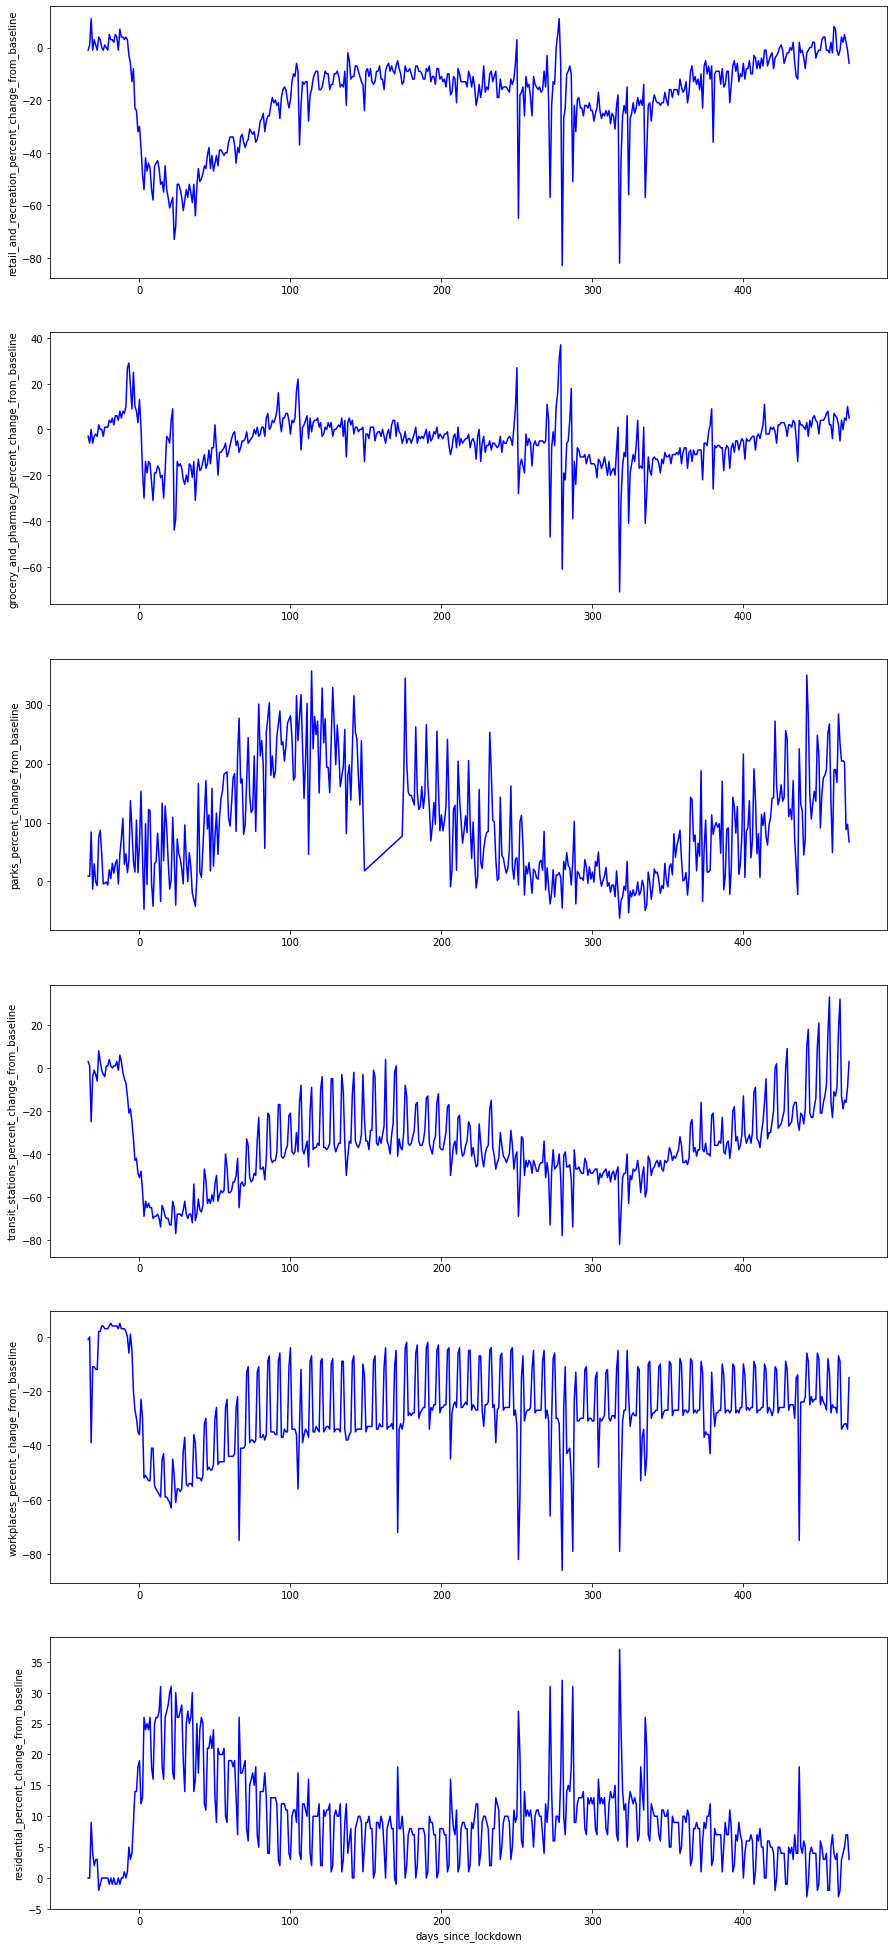

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(15, 35))
sns.lineplot(x =days_since_lockdown, y=df_subset['retail_and_recreation_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[0])
sns.lineplot(x =days_since_lockdown, y=df_subset['grocery_and_pharmacy_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[1])
sns.lineplot(x =days_since_lockdown, y=df_subset['parks_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[2])
sns.lineplot(x =days_since_lockdown, y=df_subset['transit_stations_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[3])
sns.lineplot(x =days_since_lockdown, y=df_subset['workplaces_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[4])
sns.lineplot(x =days_since_lockdown, y=df_subset['residential_percent_change_from_baseline'], data=df_subset,color= 'blue', ax=axes[5])
plt.xlabel('days_since_lockdown')
plt.

Now, let's look at some vaccinated data

In [ ]:
df_vax = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv')

In [ ]:
df_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [ ]:
df_vax.shape

(11528, 14)

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 11528 non-null  object 
 1   location                             11528 non-null  object 
 2   total_vaccinations                   11128 non-null  float64
 3   total_distributed                    10947 non-null  float64
 4   people_vaccinated                    10935 non-null  float64
 5   people_fully_vaccinated_per_hundred  10310 non-null  float64
 6   total_vaccinations_per_hundred       10412 non-null  float64
 7   people_fully_vaccinated              10853 non-null  float64
 8   people_vaccinated_per_hundred        10387 non-null  float64
 9   distributed_per_hundred              10399 non-null  float64
 10  daily_vaccinations_raw               11463 non-null  float64
 11  daily_vaccinations          

In [ ]:
df_vax.isnull().sum()

date                                      0
location                                  0
total_vaccinations                      400
total_distributed                       581
people_vaccinated                       593
people_fully_vaccinated_per_hundred    1218
total_vaccinations_per_hundred         1116
people_fully_vaccinated                 675
people_vaccinated_per_hundred          1141
distributed_per_hundred                1129
daily_vaccinations_raw                   65
daily_vaccinations                       65
daily_vaccinations_per_million          804
share_doses_used                        581
dtype: int64

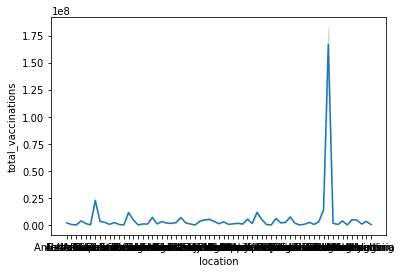

In [ ]:

sns.lineplot(x='location', y= 'total_vaccinations' ,data=df_vax)


In [ ]:
url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)

In [ ]:
df_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


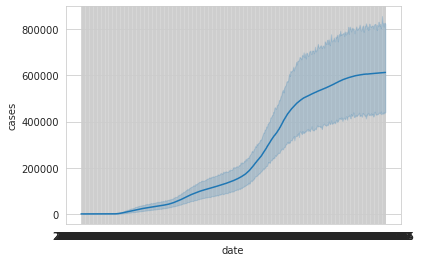

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='date',y='cases' ,data=df_cases)